# 📊 Analyse Exploratoire des Commandes

Ce notebook a pour objectif de réaliser une **analyse descriptive et visuelle** du fichier `commandes.csv`.

---

## 🧾 Objectif :
- Comprendre la distribution des commandes
- Visualiser les volumes par entrepôt, statut, mois, etc.
- Identifier des tendances ou anomalies


In [ ]:
import pandas as pd

# Chargement
df = pd.read_csv("../RAW_data/commandesV2.csv", sep=";", encoding="ISO-8859-1")

# Nettoyage de base
df["date_commande"] = pd.to_datetime(df["date_commande"], dayfirst=True)
df["mois"] = df["date_commande"].dt.month
df["jour_semaine"] = df["date_commande"].dt.dayofweek
df["annee"] = df["date_commande"].dt.year

df.head()

,id_commande,date_commande,id_produit,quantite,entrepot,statut,mois,jour_semaine,annee
0,O000001,2024-07-22,P00527,6,Marseille,Livre,7,0,2024
1,O000002,2024-02-18,P00336,5,Lyon,Expedie,2,6,2024
2,O000003,2024-03-19,P00084,6,Lyon,Annule,3,1,2024
3,O000004,2024-08-28,P00887,8,Lyon,Livre,8,2,2024
4,O000005,2024-12-14,P00778,1,Marseille,Annule,12,5,2024


## 📈 Statistiques globales

In [3]:
df.describe(include='all')

,id_commande,date_commande,id_produit,quantite,entrepot,statut,mois,jour_semaine,annee
count,50000,50000,50000,50000.000000,50000,50000,50000.000000,50000.000000,50000.0
unique,50000,NaN,1000,NaN,3,4,NaN,NaN,NaN
top,O000001,NaN,P00762,NaN,Paris,Livre,NaN,NaN,NaN
freq,1,NaN,75,NaN,16778,29739,NaN,NaN,NaN
mean,NaN,2024-06-30 18:20:26.880000256,NaN,4.987300,NaN,NaN,6.488320,3.007160,2024.0
min,NaN,2024-01-01 00:00:00,NaN,1.000000,NaN,NaN,1.000000,0.000000,2024.0
25%,NaN,2024-03-30 00:00:00,NaN,3.000000,NaN,NaN,3.000000,1.000000,2024.0
50%,NaN,2024-07-01 00:00:00,NaN,5.000000,NaN,NaN,7.000000,3.000000,2024.0
75%,NaN,2024-09-30 00:00:00,NaN,7.000000,NaN,NaN,9.000000,5.000000,2024.0
max,NaN,2024-12-31 00:00:00,NaN,9.000000,NaN,NaN,12.000000,6.000000,2024.0


## ✅ Répartition des commandes par statut

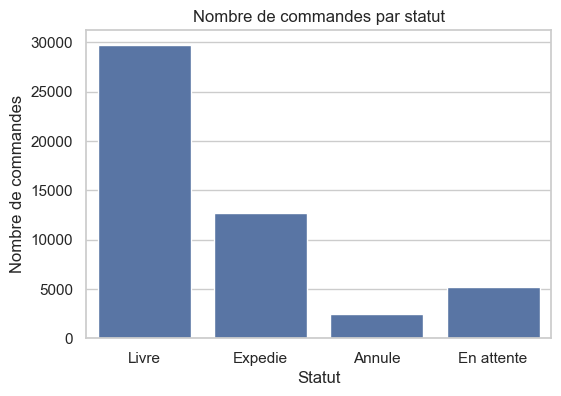

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="statut", data=df)
plt.title("Nombre de commandes par statut")
plt.xlabel("Statut")
plt.ylabel("Nombre de commandes")
plt.show()

## 🏬 Volume de commandes par entrepôt

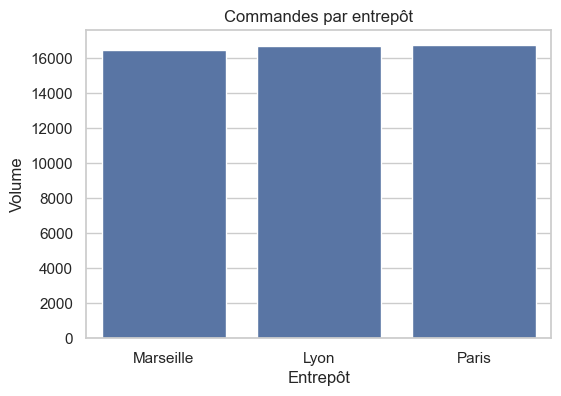

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x="entrepot", data=df)
plt.title("Commandes par entrepôt")
plt.xlabel("Entrepôt")
plt.ylabel("Volume")
plt.show()

## 📆 Commandes par mois

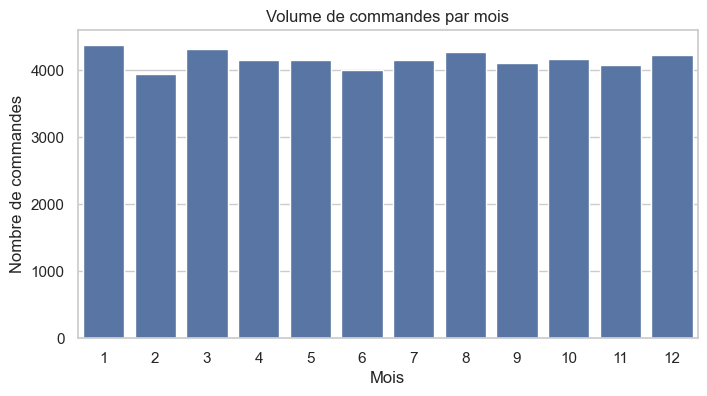

In [6]:
plt.figure(figsize=(8, 4))
sns.countplot(x="mois", data=df, order=sorted(df["mois"].unique()))
plt.title("Volume de commandes par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.show()

## 🔄 Statut des commandes selon l’entrepôt

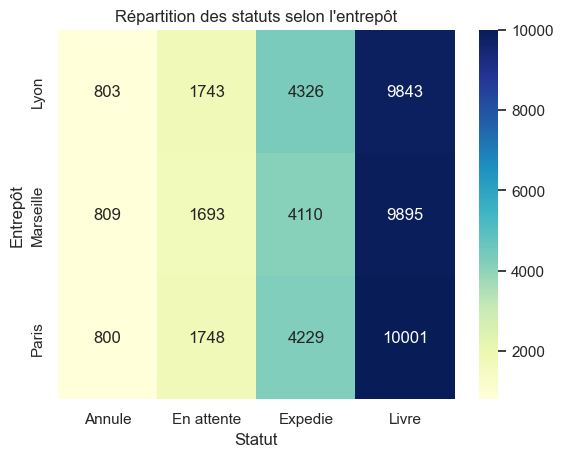

In [7]:
ct = pd.crosstab(df["entrepot"], df["statut"])
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Répartition des statuts selon l'entrepôt")
plt.ylabel("Entrepôt")
plt.xlabel("Statut")
plt.show()

## ✅ Conclusion

Cette analyse descriptive permet de :
- Visualiser la **répartition des commandes** par statut, entrepôt, mois
- Identifier des différences entre les **entrepôts** (ex : plus d'annulations à Marseille ?)
- Avoir une base solide avant d’éventuelles prédictions

📌 Prochaine étape possible : détection d’anomalies, ou prédiction du statut.
